In [1]:
from pathlib import Path

def get_base_dir() -> Path:
    try:
        return Path(__file__).resolve().parent
    except NameError:
        return Path.cwd()

BASE_DIR = get_base_dir().parent  # go one directory up
OUTPUTS_DIR = BASE_DIR / "outputs"

pecha_files = list(OUTPUTS_DIR.rglob("*.json"))
print(f"Number of pechas : {len(pecha_files)}")


Number of pechas : 268


In [2]:
import json

pechas: list[dict] = []
for pecha in pecha_files:
    pechas.append(json.loads(pecha.read_text(encoding="utf-8")))


In [3]:
import matplotlib.pyplot as plt

volumes: dict[int, int] = {}
for pecha in pechas:
    text: dict[str, str] = pecha["texts"]
    vol_freq = len(text.keys())
    
    if vol_freq in volumes:
        volumes[vol_freq] += 1
    else:
        volumes[vol_freq] = 1


print(volumes)

{1: 266, 103: 1, 213: 1}


### Text Analysis

In [4]:
from tqdm import tqdm
from bo_sent_tokenizer import segment


# Text Analysis
char_count: dict[str, int] = {}
sentence_count: dict[str, int] = {}

for pecha in tqdm(pechas, desc="Text Analysis"):
    text = list(pecha["texts"].values())[0]

    # Character Count
    char_count[pecha["pecha_id"]] = len(text)

    # Sentence Count
    sentences = segment(text)
    sentence_count[pecha["pecha_id"]] = len(sentences.splitlines())

Text Analysis: 100%|██████████| 268/268 [00:06<00:00, 41.11it/s]


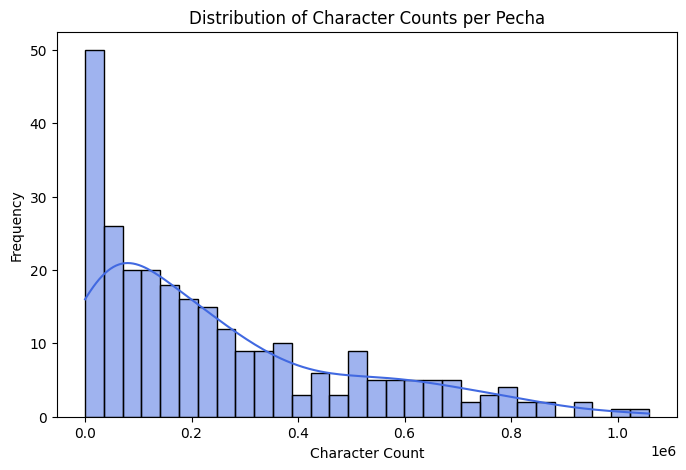

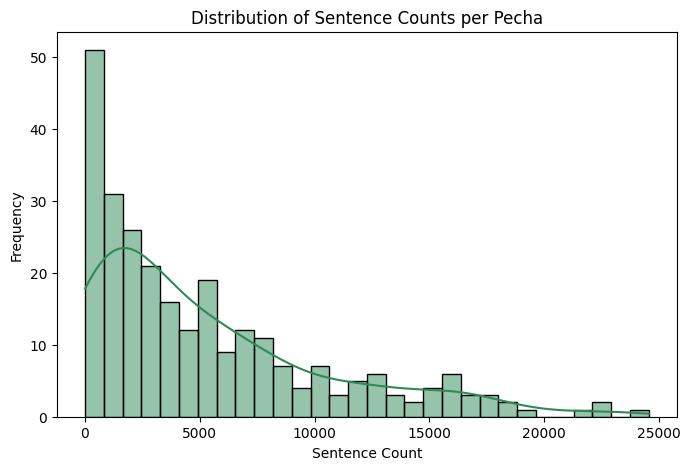

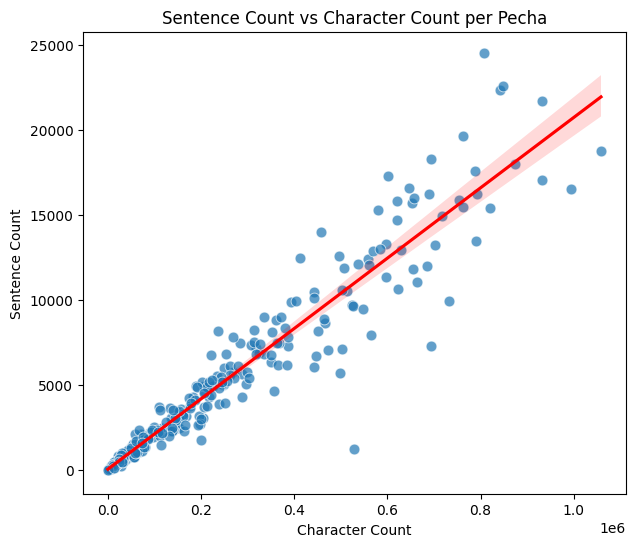

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame for plotting
df = pd.DataFrame({
    "pecha_id": list(char_count.keys()),
    "char_count": list(char_count.values()),
    "sentence_count": list(sentence_count.values())
})

# --- Plot 1: Distribution of Character Counts ---
plt.figure(figsize=(8, 5))
sns.histplot(df["char_count"], bins=30, kde=True, color="royalblue", edgecolor="black")
plt.title("Distribution of Character Counts per Pecha")
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.show()

# --- Plot 2: Distribution of Sentence Counts ---
plt.figure(figsize=(8, 5))
sns.histplot(df["sentence_count"], bins=30, kde=True, color="seagreen", edgecolor="black")
plt.title("Distribution of Sentence Counts per Pecha")
plt.xlabel("Sentence Count")
plt.ylabel("Frequency")
plt.show()

# --- Plot 3: Relationship between Char Count and Sentence Count ---
plt.figure(figsize=(7, 6))
sns.scatterplot(data=df, x="char_count", y="sentence_count", s=60, alpha=0.7)
sns.regplot(data=df, x="char_count", y="sentence_count", scatter=False, color="red")  # trend line
plt.title("Sentence Count vs Character Count per Pecha")
plt.xlabel("Character Count")
plt.ylabel("Sentence Count")
plt.show()


In [6]:
df.describe()

,char_count,sentence_count
count,2.680000e+02,268.000000
mean,2.539051e+05,5307.899254
std,2.415258e+05,5249.153143
min,1.190000e+02,5.000000
25%,5.768850e+04,1175.250000
50%,1.773945e+05,3532.000000
75%,3.743878e+05,7485.750000
max,1.058349e+06,24548.000000


In [10]:
"""
Analysis of Kangyur and Tengyur
"""

from tqdm import tqdm
from bo_sent_tokenizer import segment

BASE_DIR = get_base_dir().parent  # go one directory up
OUTPUTS_DIR = BASE_DIR / "outputs"

# Text Analysis
char_count: dict[str, int] = {}
sentence_count: dict[str, int] = {}

pecha_ids = [ "P000001", "P000002"]

pechas = [json.loads(Path(OUTPUTS_DIR / f"{pecha_id}.json").read_text(encoding="utf-8")) for pecha_id in pecha_ids]
for pecha in tqdm(pechas, desc="Text Analysis"):
    vol_texts: dict[str, str] = pecha["texts"]

    for vol_id, text in vol_texts.items():
        pecha_id = pecha["pecha_id"]
        # Character Count
        char_count[f"{pecha_id}_{vol_id}"] = len(text)

        # Sentence Count
        sentences = segment(text)
        sentence_count[f"{pecha_id}_{vol_id}"] = len(sentences.splitlines())

Text Analysis: 100%|██████████| 2/2 [00:30<00:00, 15.24s/it]


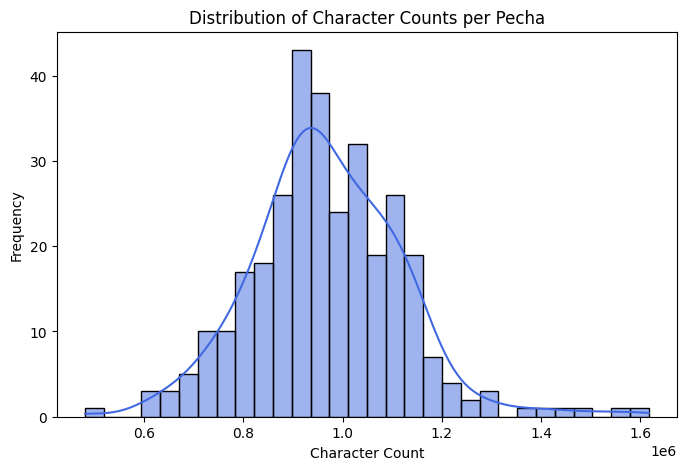

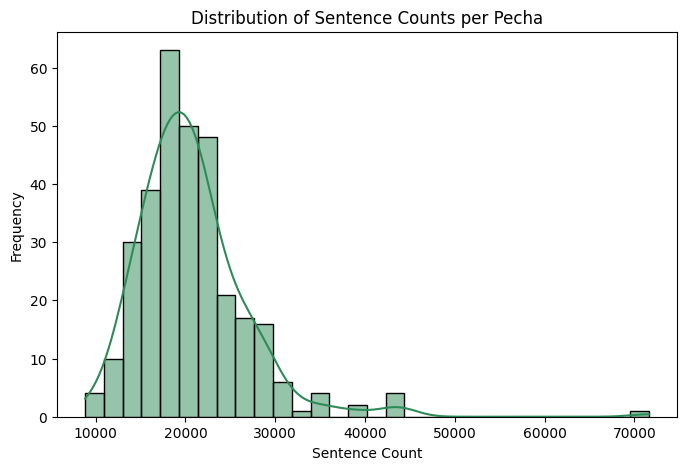

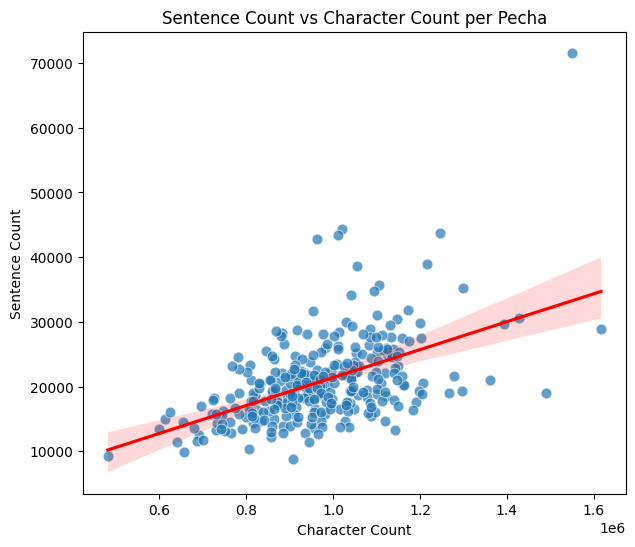

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame for plotting
df = pd.DataFrame({
    "pecha_id": list(char_count.keys()),
    "char_count": list(char_count.values()),
    "sentence_count": list(sentence_count.values())
})

# --- Plot 1: Distribution of Character Counts ---
plt.figure(figsize=(8, 5))
sns.histplot(df["char_count"], bins=30, kde=True, color="royalblue", edgecolor="black")
plt.title("Distribution of Character Counts per Pecha")
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.show()

# --- Plot 2: Distribution of Sentence Counts ---
plt.figure(figsize=(8, 5))
sns.histplot(df["sentence_count"], bins=30, kde=True, color="seagreen", edgecolor="black")
plt.title("Distribution of Sentence Counts per Pecha")
plt.xlabel("Sentence Count")
plt.ylabel("Frequency")
plt.show()

# --- Plot 3: Relationship between Char Count and Sentence Count ---
plt.figure(figsize=(7, 6))
sns.scatterplot(data=df, x="char_count", y="sentence_count", s=60, alpha=0.7)
sns.regplot(data=df, x="char_count", y="sentence_count", scatter=False, color="red")  # trend line
plt.title("Sentence Count vs Character Count per Pecha")
plt.xlabel("Character Count")
plt.ylabel("Sentence Count")
plt.show()


In [12]:
df.describe()

,char_count,sentence_count
count,3.160000e+02,316.000000
mean,9.690605e+05,20733.360759
std,1.524024e+05,6354.466242
min,4.811990e+05,8824.000000
25%,8.797618e+05,16859.500000
50%,9.579165e+05,19856.000000
75%,1.056583e+06,23197.500000
max,1.616827e+06,71600.000000
